# 天池金融风控入门赛

https://tianchi.aliyun.com/competition/entrance/531830/introduction


## 题目情况与目的

该数据来自某信贷平台的贷款记录，总数据量超过120w，包含47列变量信息，其中15列为匿名变量。为了保证比赛的公平性，将会从中抽取80万条作为训练集，20万条作为测试集A，20万条作为测试集B，同时会对employmentTitle、purpose、postCode和title等信息进行脱敏。

- id	为贷款清单分配的唯一信用证标识
- loanAmnt	贷款金额
- term	贷款期限（year）
- interestRate	贷款利率
- installment	分期付款金额
- grade	贷款等级
- subGrade	贷款等级之子级
- employmentTitle	就业职称
- employmentLength	就业年限（年）
- homeOwnership	借款人在登记时提供的房屋所有权状况
- annualIncome	年收入
- verificationStatus	验证状态
- issueDate	贷款发放的月份
- purpose	借款人在贷款申请时的贷款用途类别
- postCode	借款人在贷款申请中提供的邮政编码的前3位数字
- regionCode	地区编码
- dti	债务收入比
- delinquency_2years	借款人过去2年信用档案中逾期30天以上的违约事件数
- ficoRangeLow	借款人在贷款发放时的fico所属的下限范围
- ficoRangeHigh	借款人在贷款发放时的fico所属的上限范围
- openAcc	借款人信用档案中未结信用额度的数量
- pubRec	贬损公共记录的数量
- pubRecBankruptcies	公开记录清除的数量
- revolBal	信贷周转余额合计
- revolUtil	循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
- totalAcc	借款人信用档案中当前的信用额度总数
- initialListStatus	贷款的初始列表状态
- applicationType	表明贷款是个人申请还是与两个共同借款人的联合申请
- earliesCreditLine	借款人最早报告的信用额度开立的月份
- title	借款人提供的贷款名称
- policyCode	公开可用的策略_代码=1新产品不公开可用的策略_代码=2
- n系列匿名特征	匿名特征n0-n14，为一些贷款人行为计数特征的处理

匿名特征是未告知数据列所属的性质的特征列

## 评分卡
评分卡是一张拥有分数刻度会让相应阈值的表。信用评分卡是用于用户信用的一张刻度表。以下代码是一个非标准评分卡的代码流程，用于刻画用户的信用评分。评分卡是金融风控中常用的一种对于用户信用进行刻画的手段

## 数据分析

了解数据，熟悉数据

### 目的

- 1.EDA价值主要在于熟悉了解整个数据集的基本情况（缺失值，异常值），对数据集进行验证是否可以进行接下来的机器学习或者深度学习建模.

- 2.了解变量间的相互关系、变量与预测值之间的存在关系。

- 3.为特征工程做准备


- 数据总体了解：
  - 读取数据集并了解数据集大小，原始特征维度；
  - 通过info熟悉数据类型；
  - 粗略查看数据集中各特征基本统计量；
- 缺失值和唯一值：
  - 查看数据缺失值情况
  - 查看唯一值特征情况
- 深入数据-查看数据类型
  - 类别型数据
  - 数值型数据
    - 离散数值型数据
    - 连续数值型数据
- 数据间相关关系
  - 特征和特征之间关系
  - 特征和目标变量之间关系
- 用pandas_profiling生成数据报告

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('/Users/ousei/Documents/数据分析/work/data/train.csv')

data_test = pd.read_csv('/Users/ousei/Documents/数据分析/work/data/testA.csv')

FileNotFoundError: [Errno 2] File /Users/ousei/Documents/数据分析/work/data/train.csv does not exist: '/Users/ousei/Documents/数据分析/work/data/train.csv'

In [3]:
data_train.head(5)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


可以使用nrows参数,来设置读取文件的前多少行,nrows是一个大于等于0的整数

```python
data_train_sample = pd.read_csv("./train.csv",nrows=5)
```

分块读取（如果文件特别大）
```python
#设置chunksize参数，来控制每次迭代数据的大小
chunker = pd.read_csv("./train.csv",chunksize=5")
for item in chunker:
    print(type(item))
    print(len(item))
```

In [5]:
# 总体了解
#查看数据集的样本个数和原始特征维度
data_train.shape

(800000, 47)

In [6]:
data_test.shape

(200000, 46)

In [7]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [9]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [11]:
#查看缺失值,一共有多少列的特征有缺失值
data_train.isnull().any().sum()

22

In [20]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()

In [21]:
print(have_null_fea_dict)

{'id': 0.0, 'loanAmnt': 0.0, 'term': 0.0, 'interestRate': 0.0, 'installment': 0.0, 'grade': 0.0, 'subGrade': 0.0, 'employmentTitle': 1.25e-06, 'employmentLength': 0.05849875, 'homeOwnership': 0.0, 'annualIncome': 0.0, 'verificationStatus': 0.0, 'issueDate': 0.0, 'isDefault': 0.0, 'purpose': 0.0, 'postCode': 1.25e-06, 'regionCode': 0.0, 'dti': 0.00029875, 'delinquency_2years': 0.0, 'ficoRangeLow': 0.0, 'ficoRangeHigh': 0.0, 'openAcc': 0.0, 'pubRec': 0.0, 'pubRecBankruptcies': 0.00050625, 'revolBal': 0.0, 'revolUtil': 0.00066375, 'totalAcc': 0.0, 'initialListStatus': 0.0, 'applicationType': 0.0, 'earliesCreditLine': 0.0, 'title': 1.25e-06, 'policyCode': 0.0, 'n0': 0.0503375, 'n1': 0.0503375, 'n2': 0.0503375, 'n3': 0.0503375, 'n4': 0.04154875, 'n5': 0.0503375, 'n6': 0.0503375, 'n7': 0.0503375, 'n8': 0.05033875, 'n9': 0.0503375, 'n10': 0.04154875, 'n11': 0.08719, 'n12': 0.0503375, 'n13': 0.0503375, 'n14': 0.0503375}


In [24]:
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.05:
        fea_null_moreThanHalf[key] = value

In [25]:
fea_null_moreThanHalf

{'employmentLength': 0.05849875,
 'n0': 0.0503375,
 'n1': 0.0503375,
 'n2': 0.0503375,
 'n3': 0.0503375,
 'n5': 0.0503375,
 'n6': 0.0503375,
 'n7': 0.0503375,
 'n8': 0.05033875,
 'n9': 0.0503375,
 'n11': 0.08719,
 'n12': 0.0503375,
 'n13': 0.0503375,
 'n14': 0.0503375}

<AxesSubplot:>

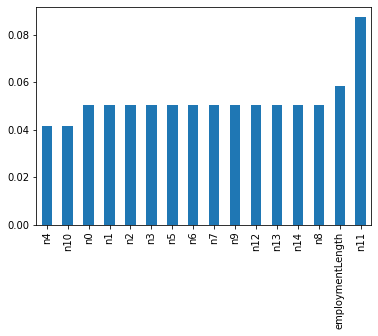

In [27]:
#具体的查看缺失特征及缺失率
#nan
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing>0.03]
missing.sort_values(inplace = True)
missing.plot.bar()

- 了解哪些列存在'nan',并把nan的个数打印,主要目的是观察是否存在某一列有非常多的缺失值,可以考虑删掉。缺失值很小可以选择填充。

- lgb模型可以自动处理缺失值。

## 查看训练集测试集中特征属性只有一值的特征

In [28]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]

In [31]:
one_value_fea_test = [col for col in data_test.columns if data_test[col].nunique() <= 1]

In [32]:
print(one_value_fea)
print(one_value_fea_test)

['policyCode']
['policyCode']


## 总结
47列数据中有22列都缺少数据，‘policyCode’具有一个唯一值（或全部缺失）。有很多连续变量和一些分类变量。

## 查看特征的数值类型有哪些，对象类型有哪些

- 特征一般都是由类别型特征和数值型特征组成，而数值型特征又分为连续型和离散型。
- 类别型特征有时具有非数值关系，有时也具有数值关系。比如‘grade’中的等级A，B，C等，是否只是单纯的分类，还是A优于其他要结合业务判断。
- 数值型特征本是可以直接入模的，但往往风控人员要对其做分箱，转化为WOE编码进而做标准评分卡等操作。从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。

In [33]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)

['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


## 查看特征的数值类型有哪些，对象类型有哪些

- 特征一般都是由类别型特征和数值型特征组成，而数值型特征又分为连续型和离散型。

- 类别型特征有时具有非数值关系，有时也具有数值关系。比如‘grade’中的等级A，B，C等，是否只是单纯的分类，还是A优于其他要结合业务判断。

- 数值型特征本是可以直接入模的，但往往风控人员要对其做分箱，转化为WOE编码进而做标准评分卡等操作。从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。

In [ ]:
#exclude 寻找特定的数据类型的列
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns))

In [ ]:
numerical_fea

In [ ]:
category_fea

In [ ]:
data_train.grade